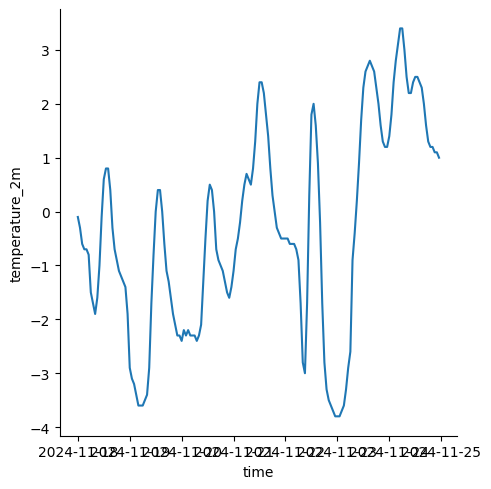

In [ ]:
import requests
import matplotlib.pyplot as plt
from dateutil.parser import parse
import pandas as pd
import seaborn as sns

params = dict

# Request information using online URL builder interface
r = requests.get('https://api.open-meteo.com/v1/forecast?latitude=55.9&longitude=-3.2&hourly=temperature_2m,precipitation&timezone=Europe%2FLondon')
#  print(r.json())

# Parse the Json data to a dictionary
data = pd.DataFrame(r.json()['hourly'])
data['time'] = pd.to_datetime(data['time'])


# print(data)
# data.info


# NOTE: doing this with Pandas is probably a lot easier! Revisit this in a couple of weeks...
# Convenience function for extracting data from a JSON request

In [ ]:
def get_weather_data(r, frequency, variables):
    '''
    Returns only the required data from a JSON request.
    The result is a dictionary in the form:
    {'units': {variables[0]: unit, variables[1]: unit, ...},
     'variables[0]': [.., .., .., ..],
     'variables[1]': [.., .., .., ..],
     ...}

    Input:
        r (Request): the request object
        frequency (str): 'hourly' or 'daily'.
        variables (list): a list of the required variable names.

    Output:
        weather_dict (dict): a dictionary containing only the required data.
    '''
    # Parse the JSON data to a dictionary
    data = r.json()
    data = pd.DataFrame(r.json()['hourly'])
    data['time'] = pd.to_datetime(data['time'])

    # Start an empty dictionary, populate the timestamps parsed as datetime objects
    weather_dict = {'timestamps': [parse(t) for t in data[frequency]['time']]}

    # Start a dictionary item to store the units
    weather_dict['units'] = {var: data[f'{frequency}_units'][var] for var in variables}

    # Extract the data, add to dictionary
    for var in variables:
        weather_dict[var] = data[frequency][var]

    # Return the data
    return weather_dict

In [ ]:
if __name__== '__main__':
    city_name = 'Edinburgh'
    frequency = 'hourly'
    variables = ['temperature_2m', 'cloud_cover']
    weather_data = get_weather_data(city_name, frequency, variables)
    print(weather_data.head(20))

    # # Plot just the temperature data over time
    # sns.relplot(data = data, x='time', y='temperature_2m', kind='line')
    # plt.show()

    # Plot temperature and cloud cover in 2 seperate subplots
    sns.relplot(data=weather_data, x='time', y='temperature_2m',hue='cloud_cover')

    # First: covert to long format
    weather_data = pd.melt(weather_data,id_vars=['time'], value_vars=['temperature_2m', 'cloud_cover'])

    sns.relplot(data=weather_data, x='time', y='value', col='variable')
    plt.show()

In [ ]:
# Exercise:
# - Add more weather variables.
# - Incorporate the units in the labels/titles.
# - Get data for another city, merge it with first city, plot data for the 2 cities in the same figure.